# Decision Tree

Assignment

About the data: Let’s consider a Company dataset with around 10 variables and 400 records. The attributes are as follows:  Sales -- Unit sales (in thousands) at each location  Competitor Price -- Price charged by competitor at each location  Income -- Community income level (in thousands of dollars)  Advertising -- Local advertising budget for company at each location (in thousands of dollars)  Population -- Population size in region (in thousands)  Price -- Price company charges for car seats at each site  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site  Age -- Average age of the local population  Education -- Education level at each location  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location  US -- A factor with levels No and Yes to indicate whether the store is in the US or not The company dataset looks like this:

Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [56]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import tree

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


<AxesSubplot:xlabel='ShelveLoc', ylabel='Sales'>

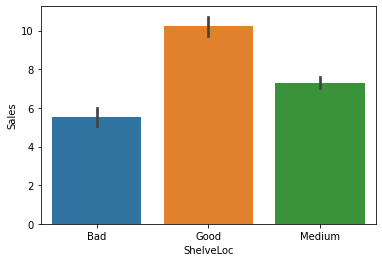

In [4]:
sns.barplot(x = 'ShelveLoc',y = 'Sales', data = df)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

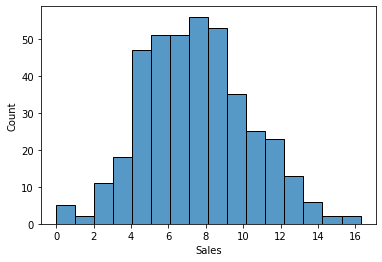

In [5]:
sns.histplot(df['Sales'])

D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

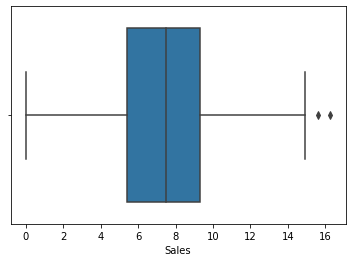

In [6]:
sns.boxplot(df['Sales'])

In [7]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
corr = df.corr()

In [9]:
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


([<matplotlib.axis.YTick at 0x21cb0d29460>,
 [Text(0, 0, 'Sales'),
  Text(0, 1, 'CompPrice'),
  Text(0, 2, 'Income'),
  Text(0, 3, 'Advertising'),
  Text(0, 4, 'Population'),
  Text(0, 5, 'Price'),
  Text(0, 6, 'Age'),
  Text(0, 7, 'Education')])

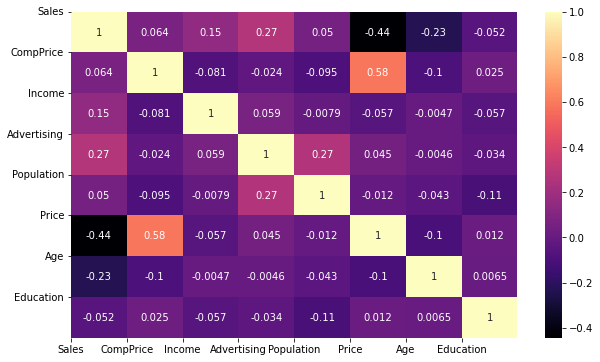

In [10]:
fig = plt.subplots(figsize=(10,6))
sns.heatmap(corr, cmap= 'magma', annot= True)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

In [11]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
df['Sales'].min()

0.0

In [13]:
df['Sales'].max()

16.27

In [14]:
df['S'] = pd.cut(x = df['Sales'], bins = [0.0 , 8, 16.27], labels = ['Bad', 'Good'])

In [15]:
df[df['Sales'].isna()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,S


In [16]:
df[df['S'].isna()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,S
174,0.0,139,24,0,358,185,Medium,79,15,No,No,NaN


In [17]:
df= df.fillna(value='Bad')

In [18]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,S
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Good
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Bad
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Bad
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Bad


In [21]:
df[df['S'].isna()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,S


D:\yb python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='S', ylabel='count'>

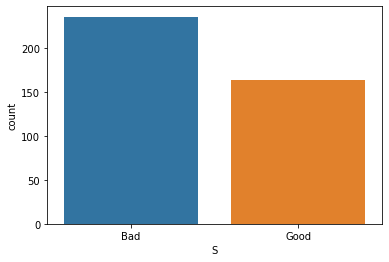

In [22]:
sns.countplot(df['S'])

In [23]:
df['S'].value_counts()

Bad     236
Good    164
Name: S, dtype: int64

In [24]:
df1 = pd.get_dummies(df.iloc[:,1:11], drop_first= True)

In [25]:
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1
396,139,23,3,37,120,55,11,0,1,0,1
397,162,26,12,368,159,40,18,0,1,1,1
398,100,79,7,284,95,50,12,0,0,1,1


In [26]:
df1 = df1.join(df['S'])

In [27]:
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,S
0,138,73,11,276,120,42,17,0,0,1,1,Good
1,111,48,16,260,83,65,10,1,0,1,1,Good
2,113,35,10,269,80,59,12,0,1,1,1,Good
3,117,100,4,466,97,55,14,0,1,1,1,Bad
4,141,64,3,340,128,38,13,0,0,1,0,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1,Good
396,139,23,3,37,120,55,11,0,1,0,1,Bad
397,162,26,12,368,159,40,18,0,1,1,1,Bad
398,100,79,7,284,95,50,12,0,0,1,1,Bad


In [28]:
df1.isnull().value_counts()

CompPrice  Income  Advertising  Population  Price  Age    Education  ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  S    
False      False   False        False       False  False  False      False           False             False      False   False    400
dtype: int64

In [29]:
df[df['Sales'].isna()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,S


In [30]:
X = df1.drop(['S'],axis =1)

In [31]:
y = df1['S']

In [32]:
y.isna().value_counts()

False    400
Name: S, dtype: int64

In [33]:
y

0      Good
1      Good
2      Good
3       Bad
4       Bad
       ... 
395    Good
396     Bad
397     Bad
398     Bad
399    Good
Name: S, Length: 400, dtype: category
Categories (2, object): ['Bad' < 'Good']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
258,108,38,0,251,81,72,14,0,0,0,0
177,138,72,0,148,94,27,17,0,1,1,1
119,130,94,8,137,128,64,12,0,1,1,1
194,112,98,18,481,128,45,11,0,1,1,1
229,98,104,0,404,72,27,18,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,58,17,0,1,0,1
106,102,33,0,217,139,70,18,0,1,0,0
270,119,26,0,284,89,26,10,1,0,1,0
348,132,102,20,459,107,49,11,1,0,1,1


In [37]:
X_test

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
209,98,21,11,326,90,76,11,0,0,0,1
280,121,86,10,496,145,51,10,0,0,1,1
33,114,38,13,317,128,50,16,1,0,1,1
210,125,41,2,357,123,47,14,0,0,0,1
93,145,30,0,67,104,55,17,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
332,106,33,20,354,104,61,12,0,1,1,1
167,106,73,0,216,93,60,13,0,1,1,0
245,114,43,0,199,88,57,10,1,0,0,1
311,146,68,12,328,132,51,14,0,0,1,1


In [38]:
y_train.nunique()

2

In [39]:
y_test.nunique()

2

[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.958\nsamples = 268\nvalue = [166, 102]'),
 Text(0.25, 0.625, 'x[4] <= 105.5\nentropy = 0.867\nsamples = 215\nvalue = [153, 62]'),
 Text(0.125, 0.375, 'x[8] <= 0.5\nentropy = 0.996\nsamples = 69\nvalue = [32, 37]'),
 Text(0.0625, 0.125, 'entropy = 0.811\nsamples = 24\nvalue = [18, 6]'),
 Text(0.1875, 0.125, 'entropy = 0.894\nsamples = 45\nvalue = [14, 31]'),
 Text(0.375, 0.375, 'x[8] <= 0.5\nentropy = 0.661\nsamples = 146\nvalue = [121, 25]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.796\nsamples = 104\nvalue = [79, 25]'),
 Text(0.75, 0.625, 'x[4] <= 135.0\nentropy = 0.804\nsamples = 53\nvalue = [13, 40]'),
 Text(0.625, 0.375, 'x[2] <= 6.0\nentropy = 0.461\nsamples = 41\nvalue = [4, 37]'),
 Text(0.5625, 0.125, 'entropy = 0.787\nsamples = 17\nvalue = [4, 13]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.875, 0.375, 'x[5] <= 60.5\nentropy = 0.811\ns

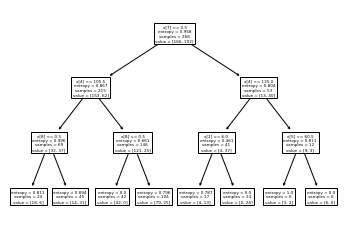

In [40]:
tree.plot_tree(model)

[Text(0.5, 0.875, 'ShelveLoc_Good <= 0.5\nentropy = 0.958\nsamples = 268\nvalue = [166, 102]\nclass = Good'),
 Text(0.25, 0.625, 'Price <= 105.5\nentropy = 0.867\nsamples = 215\nvalue = [153, 62]\nclass = Good'),
 Text(0.125, 0.375, 'ShelveLoc_Medium <= 0.5\nentropy = 0.996\nsamples = 69\nvalue = [32, 37]\nclass = Bad'),
 Text(0.0625, 0.125, 'entropy = 0.811\nsamples = 24\nvalue = [18, 6]\nclass = Good'),
 Text(0.1875, 0.125, 'entropy = 0.894\nsamples = 45\nvalue = [14, 31]\nclass = Bad'),
 Text(0.375, 0.375, 'ShelveLoc_Medium <= 0.5\nentropy = 0.661\nsamples = 146\nvalue = [121, 25]\nclass = Good'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0]\nclass = Good'),
 Text(0.4375, 0.125, 'entropy = 0.796\nsamples = 104\nvalue = [79, 25]\nclass = Good'),
 Text(0.75, 0.625, 'Price <= 135.0\nentropy = 0.804\nsamples = 53\nvalue = [13, 40]\nclass = Bad'),
 Text(0.625, 0.375, 'Advertising <= 6.0\nentropy = 0.461\nsamples = 41\nvalue = [4, 37]\nclass = Bad'),
 Text(0.5625, 0.

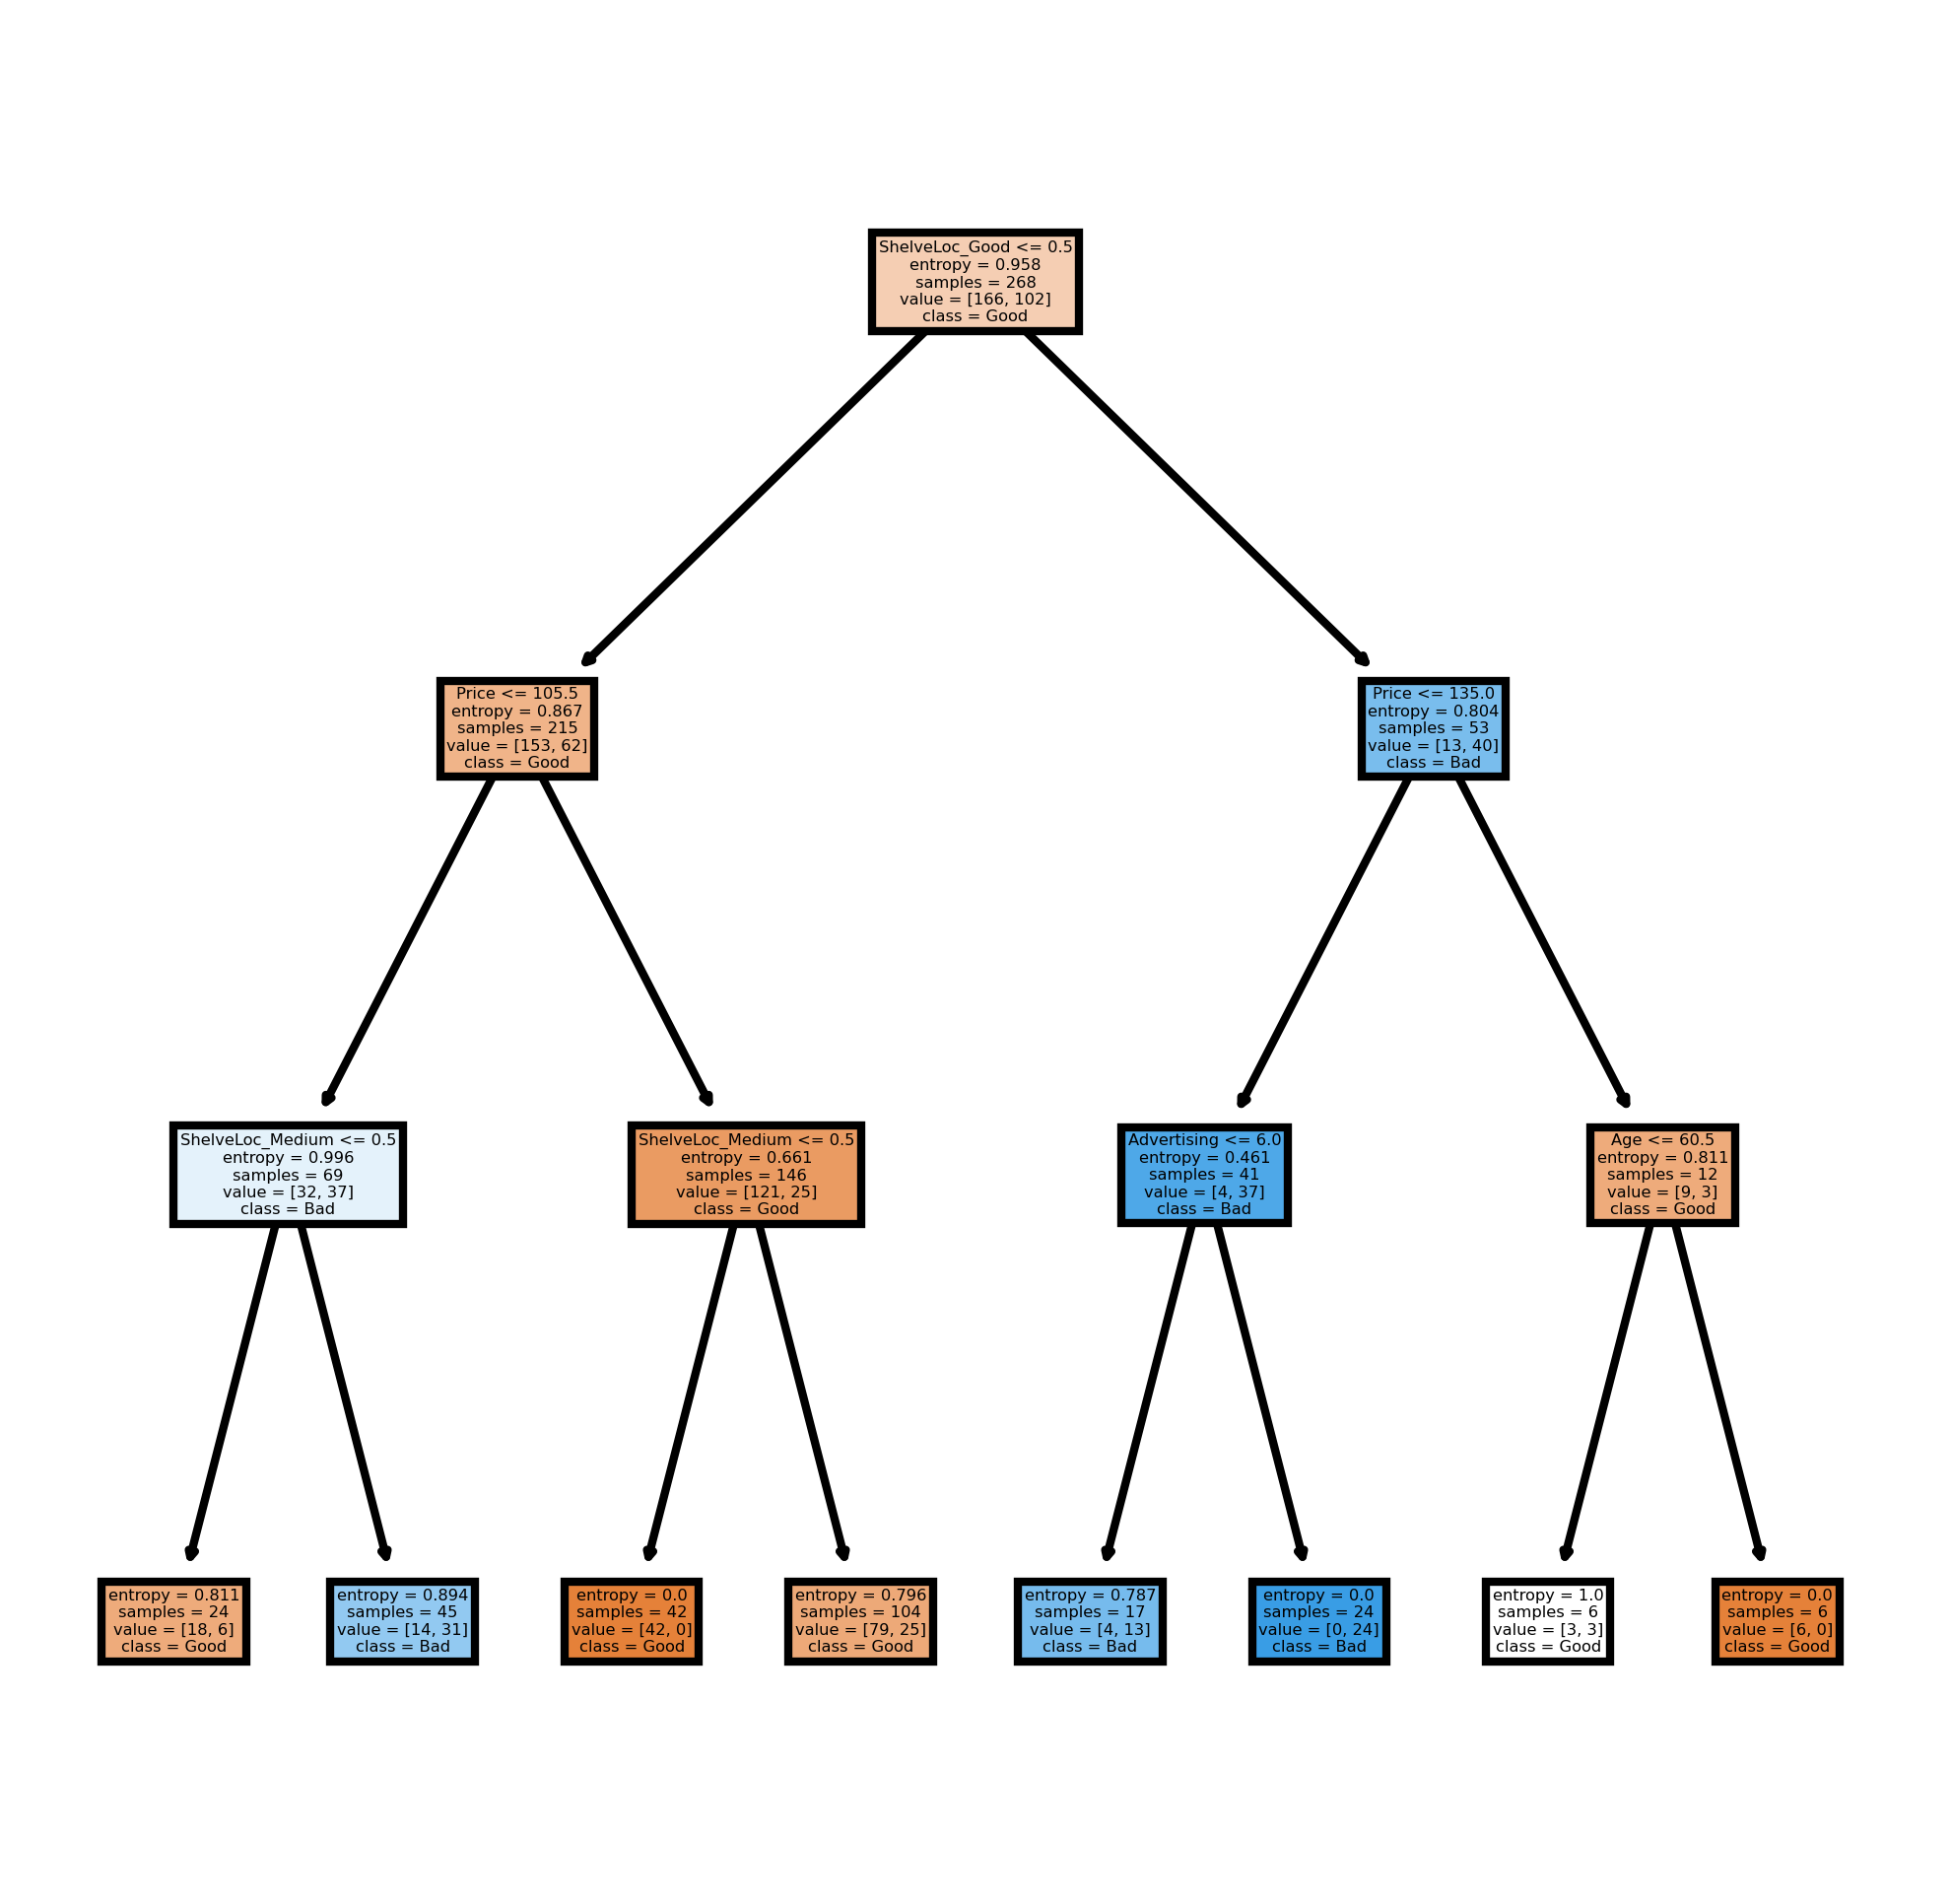

In [41]:
fig, axes = plt.subplots(ncols= 1, nrows = 1, figsize=(4,4), dpi= 600)
tree.plot_tree(model, feature_names= X.columns, class_names= ['Good', 'Bad'], filled= True)

In [54]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

Bad     77
Good    55
dtype: int64

In [53]:
preds

array(['Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good',
       'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good',
       'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad',
       'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good',
       'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad',
       'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good',

In [47]:
pd.crosstab(y_test, preds)

col_0,Bad,Good
S,,
Bad,52,18
Good,25,37


In [48]:
model.score(X_test, y_test)

0.6742424242424242

In [70]:
print(classification_report(y_pred= preds,y_true= y_test))

              precision    recall  f1-score   support

         Bad       0.68      0.74      0.71        70
        Good       0.67      0.60      0.63        62

    accuracy                           0.67       132
   macro avg       0.67      0.67      0.67       132
weighted avg       0.67      0.67      0.67       132



In [71]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)

In [72]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
pred = model_gini.predict(X_test)
pred

array(['Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good',
       'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good',
       'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad',
       'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good',
       'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad',
       'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good',

In [74]:
np.mean(pred==y_test)

0.6742424242424242